# FIR szűrő tervezés ablakozásos módszerrel

Verzió: 1.0, Dátum: 2017 március


In [1]:
# Imports

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline


Az $f_c$ a vágási frekvenciával rendelkező ideális aluláteresztő szűrő impulzusválasza:

$$h(t) =  2f_c sinc(2\pi f_ct) = 2f_c \frac{sin(2\pi f_c t)}{2\pi f_c t} = \frac{sin(2\pi f_ct)}{\pi t}$$

A digitális jelfeldolgozásban gyakran a mintavételi frekvenciára normalizáltan adjuk meg a vágási frekvenciát $f_c/f_s$ , ahol $f_s$ a mintavételi frekvencia. Mivel digitálisan mintavételezett jelekkel dolgozunk a vágási frekvencia $0$-tól a mintavételi frekvencia feléig van egyértelmű, így $f_c \leq 0.5$.

Nézzük most meg egy olyan ideális aluláteresztő szűrő impulzusválaszát, amely DC-től $0.4f_s$-ig enged át.


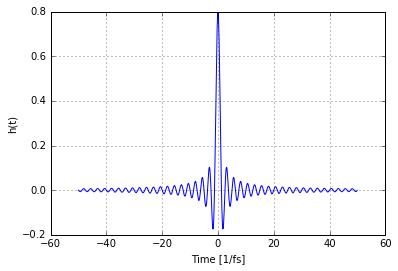

In [8]:
fc = 0.4
x  = np.arange(-50,50,0.1)
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)

plt.plot(x,hx)
plt.xlabel("Time [1/fs]")
plt.ylabel("h(t)")
plt.grid(True)


Mivel a vágási frekvenciát noramlizáltuk a mintavételi frekvenciára így a kapott ábrázolásmódban az impulzusválasz idő dimenziója is noramlizált a mintavételi periódusidőre.
A következő ábrán különböző $f_c$ vágási frekvenciával rendelkező aluláteresztő szűrők impulzusválaszát láthatjuk. (Az átfogott időablak kisebb, mint az előző esetben.)


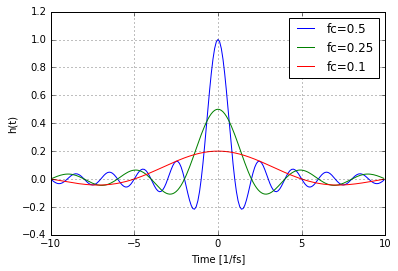

In [9]:
x  = np.arange(-10,10,0.1)
fc = 0.5
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)
plt.plot(x,hx)

fc = 0.25
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)
plt.plot(x,hx)

fc = 0.1
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)
plt.plot(x,hx)

plt.xlabel("Time [1/fs]")
plt.ylabel("h(t)")
plt.legend(("fc=0.5","fc=0.25","fc=0.1"))
plt.grid(True)

Egy FIR szűrő kimenetén megjelenő diszkrét mintasorozatot az alábbi összefüggés írja le:

$$ y[n] = \sum_{i=0}^{M-1} w_i \delta[n-iT_s]$$, ahol $T_s$ a mintavételi periódusidő, $w_i$ pedig a FIR szűrő együtthatói $i=0 ... {M-1}$.

Ebben a FIR szűrőben úgy tudjuk megvalósítani a kívánt impulzusválaszú szűrőt, hogy az együtthatók helyére betöltjük az előállítani kívánt impulzusválasz mintáit. Sajnálatos módon azonban az előbbiekben bemutatott ideális aluláteresztő szűrő nem valósítható meg mivel:
- Az ideális impulzusválasz végtelen hosszú, nekünk viszont véges az impulzusválasztunk (FIR)
- Az ideális aluláteresztő szűrő nem kauzális, vagyis jövúőbeli minták is szükségesek a jelenlegi kimenet kiszámításához.

Ahhoz, hogy ezeket a problémákat feloldjuk a szűrő impulzusválaszát csak egy korlátozott időintervallumon belül valósítjuk meg, másrészt az impulzusválaszt időben eltoljuk.
Mintavételezzük tehát az ideális aluláteresztő szűrő impulzusválaszát $M$ pontban $T_s$ időközönként, úgy, hogy az impulzusválaszt eltoljuk időben $M/2 T_s$ -el.

Felhívom a figyelmet, amennyiben a FIR szűrő együtthatóinak száma ($M$) páratlan, úgy a $t=0$ értékben is ki kell értékelni az ideális aluláteresztő szűrő impulzusválaszát ami numerikusan problémát okozhat a $0$-val való osztás miatt.
A határértkét a sinc() függvénynek azonban ismerjük a $0$-ban, ami $1$. Tehát a FIR szűrő megfelelő együtthatójának helyére $2f_c$- kell helyetesítenünk. Az alábbiakban az egyszerűség kedvéért páros együtthatókkal számolunk.
 


FIR egyutthato index: 0, ertek -0.015133
FIR egyutthato index: 1, ertek -0.046821
FIR egyutthato index: 2, ertek 0.057226
FIR egyutthato index: 3, ertek 0.028104
FIR egyutthato index: 4, ertek -0.127324
FIR egyutthato index: 5, ertek 0.065575
FIR egyutthato index: 6, ertek 0.515036
FIR egyutthato index: 7, ertek 0.515036
FIR egyutthato index: 8, ertek 0.065575
FIR egyutthato index: 9, ertek -0.127324
FIR egyutthato index: 10, ertek 0.028104
FIR egyutthato index: 11, ertek 0.057226
FIR egyutthato index: 12, ertek -0.046821
FIR egyutthato index: 13, ertek -0.015133


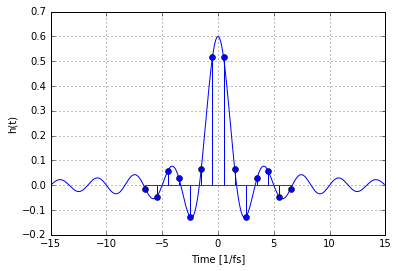

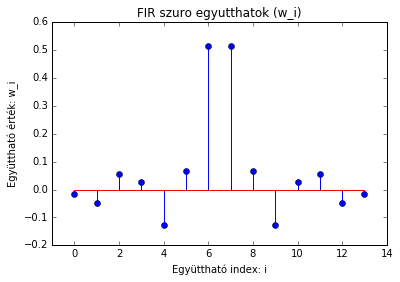

In [2]:
# Parameters
M = 14  # FIR filter tap number
fc = 0.3 # Cutoff frequency

# Ideal response
x  = np.arange(-15,15,0.1)
hx = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)

# Samples response
x_FIR_samples = np.arange(-M/2+0.5,(M)/2+0.5,1) # Spacing is 1
FIR_samples   = 2*fc * np.sin(2*np.pi*fc*x_FIR_samples)/(2*np.pi*fc*x_FIR_samples)

# Time shift
time_offset = M/2-0.5  # (Ts=1 as we normalized everything to fs)

# Plotting
plt.plot(x,hx)
plt.xlabel("Time [1/fs]")
plt.ylabel("h(t)")
plt.stem(x_FIR_samples, FIR_samples, basefmt='r-')
plt.grid(True)

plt.figure(2)
plt.title("FIR szuro egyutthatok (w_i)")
plt.xlabel("Együttható index: i")
plt.ylabel("Együttható érték: w_i")
plt.stem(x_FIR_samples+time_offset, FIR_samples, basefmt='r-')
plt.xlim(x_FIR_samples[0]+time_offset-1, x_FIR_samples[M-1]+time_offset+1)

for i in range(M):    
    print("FIR egyutthato index: %d, ertek %f"%(x_FIR_samples[i]+time_offset,FIR_samples[i]))



Az alábbi segédfügvények a Python SciPy csomagjának beépített függvényeit használják arra, hogy egy FIR szűrő frekvenciatartománybeli választát kirajzolják.

In [62]:
# These functions are used to plot the requency and phase response of an FIR filter. See [2]
def plot_transfer_amp(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    
    plt.plot(w/max(w)/2,h_dB)
    plt.ylim(-50, 20)
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')    
    
def plot_transfer_phase(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w/max(w),h_Phase)
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response')
    plt.subplots_adjust(hspace=0.5)


Végül pedig tervezzünk egy FIR alulátersztő szűrőt a kívánt beállításokkal és nézzük meg annak frekvenciatartománybeli válaszát.

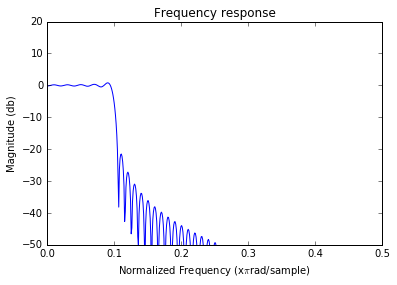

In [70]:
M = 100  # Number of filter taps
fs = 64 *10**6  # Sampling frequency  [Hz]
fc = 16 *10**6  # Cut of frequency [Hz]

fc_norm = fc/fs  # Normalized cut of frequency 

fc = 0.1
x  =  np.arange(-M/2+0.5,(M)/2+0.5,1) 
FIR_coeffs = 2*fc * np.sin(2*np.pi*fc*x)/(2*np.pi*fc*x)

""" Uncomment to display coefficients
# Time shift
time_offset = M/2-0.5  # (Ts=1 as we normalized everything to fs)
for i in range(M):    
    print("FIR egyutthato index: %d, ertek %f"%(x[i]+time_offset,FIR_coeffs[i]))
"""    
plot_transfer_amp(FIR_coeffs)


## References 

   [1] Dr. Andrew Greensted, FIR FIlter by Windowing, http://www.labbookpages.co.uk/audio/firWindowing.html, 2017 march  
   [2] Matti Pastel, FIR filter design with Python and SciPy, http://mpastell.com/pweave/_downloads/FIR_design_rst.html, 2017 march